In [1]:
# Importar bibliotecas necessárias

import json
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import seaborn as sns


Aqui, definimos o caminho para o arquivo JSON que contém as MFCCs e os rótulos dos gêneros musicais. Também criamos a função load_data que irá carregar esses dados, converter listas em arrays NumPy e retornar as features (X), os rótulos (y) e o mapeamento dos gêneros musicais.

In [ ]:
# define o caminho para o arquivo JSON contendo as MFCCs e rótulos
DATA_PATH = "../data/data_10.json"

def load_data(data_path):   # Carrega os dados de treinamento a partir de um arquivo JSON.
    
    
    """
    
    data_path (str): Caminho para o arquivo JSON contendo os dados.
    return X: Inputs (MFCCs).
    return y: Targets (Rótulos de gêneros).
    mapping: Lista de gêneros musicais.


    """
    with open(data_path, "r") as fp:
        data = json.load(fp)
    
    # Converter listas para arrays numpy
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    mapping = data["mapping"]
    
    print("Dados carregados com sucesso!")
    print(f"Shape de X: {X.shape}")
    print(f"Shape de y: {y.shape}")
    print(f"Gêneros: {mapping}")
    
    return X, y, mapping

# Carregar os dados
X, y, genres = load_data(DATA_PATH)


Dados carregados com sucesso!
Shape de X: (9900, 130, 13)
Shape de y: (9900,)
Gêneros: ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


Aqui estamos verificando como os dados estão distribuídos entre as diferentes classes de gêneros musicais. Utilizamos o pandas para criar um DataFrame com os rótulos e, em seguida, plotamos um gráfico de barras para visualizar a quantidade de segmentos em cada gênero.

C:\Users\ianfe\AppData\Local\Temp\ipykernel_14452\2105979646.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres, y=label_counts.values, palette="viridis")


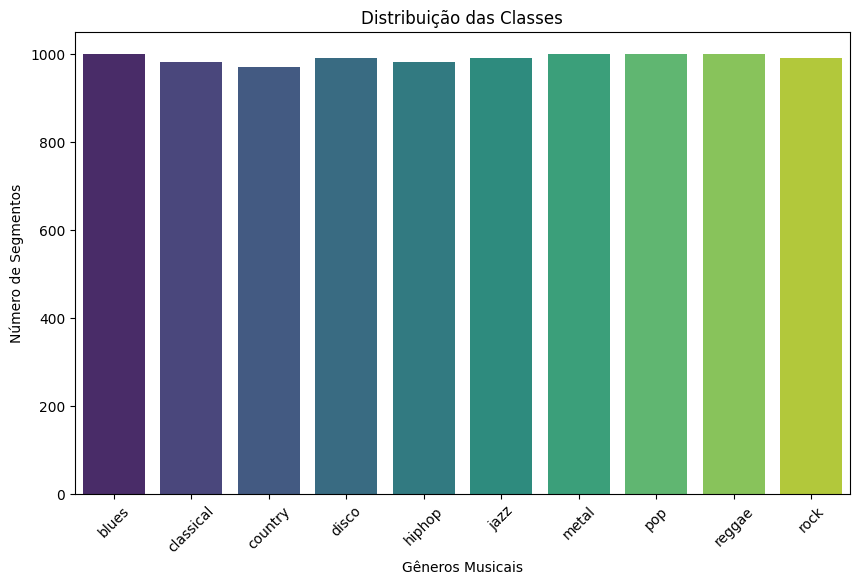

In [3]:
# Verificar a distribuição das classes
import pandas as pd

# Criar um DataFrame para facilitar a visualização
df = pd.DataFrame(y, columns=["label"])

# Contagem de cada classe
label_counts = df["label"].value_counts().sort_index()

# Plotar a distribuição das classes
plt.figure(figsize=(10,6))
sns.barplot(x=genres, y=label_counts.values, palette="viridis")
plt.title("Distribuição das Classes")
plt.xlabel("Gêneros Musicais")
plt.ylabel("Número de Segmentos")
plt.xticks(rotation=45)
plt.show()


aqui dividimos os dados em conjuntos de treinamento e teste utilizando a função train_test_split. Definimos a proporção de teste como 20% e utilizamos a opção stratify para garantir que a distribuição das classes seja mantida em ambos os conjuntos.

In [4]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Shape de X_train: {X_train.shape}")
print(f"Shape de X_test: {X_test.shape}")
print(f"Shape de y_train: {y_train.shape}")
print(f"Shape de y_test: {y_test.shape}")


Shape de X_train: (7920, 130, 13)
Shape de X_test: (1980, 130, 13)
Shape de y_train: (7920,)
Shape de y_test: (1980,)


construímos o modelo de rede neural utilizando o Keras. A arquitetura inclui uma camada de entrada que achata os dados, seguida por camadas densas com funções de ativação ReLU e dropout para evitar overfitting. A camada de saída utiliza a função de ativação softmax para classificação multi-classe.

In [5]:
# Definir a arquitetura do modelo
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(X_train.shape[1], X_train.shape[2])),
    
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.3),
    
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.3),
    
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    
    keras.layers.Dense(len(genres), activation='softmax')  # Camada de saída com softmax para classificação multi-classe
])

# Compilar o modelo
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Resumo do modelo
model.summary()


c:\Users\ianfe\Desktop\music bot\env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 1690)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       865,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,031,306 (3.93 MB)

 Trainable params: 1,031,306 (3.93 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Treinar o modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1588 - loss: 35.4268 - val_accuracy: 0.3288 - val_loss: 2.7256
Epoch 2/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2139 - loss: 6.5016 - val_accuracy: 0.3061 - val_loss: 2.1856
Epoch 3/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2228 - loss: 3.4267 - val_accuracy: 0.3136 - val_loss: 2.0549
Epoch 4/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2525 - loss: 2.5653 - val_accuracy: 0.3207 - val_loss: 2.0073
Epoch 5/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2839 - loss: 2.2661 - val_accuracy: 0.3540 - val_loss: 1.8973
Epoch 6/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3034 - loss: 2.1632 - val_accuracy: 0.3586 - val_loss: 1.8648
Epoch 7/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3037 - loss: 2.0805 - val_accuracy: 0.3667 - val_loss: 1.8171
Epoch 8/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3360 - loss: 1.9975 - val_accuracy: 0

In [7]:
# Avaliar o modelo nos dados de teste
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nAcurácia no conjunto de teste: {test_acc * 100:.2f}%")


62/62 - 0s - 1ms/step - accuracy: 0.5343 - loss: 1.4679

Acurácia no conjunto de teste: 53.43%


plotamos gráficos da acurácia e da perda durante o treinamento e a validação para analisar o desempenho do modelo ao longo das épocas.

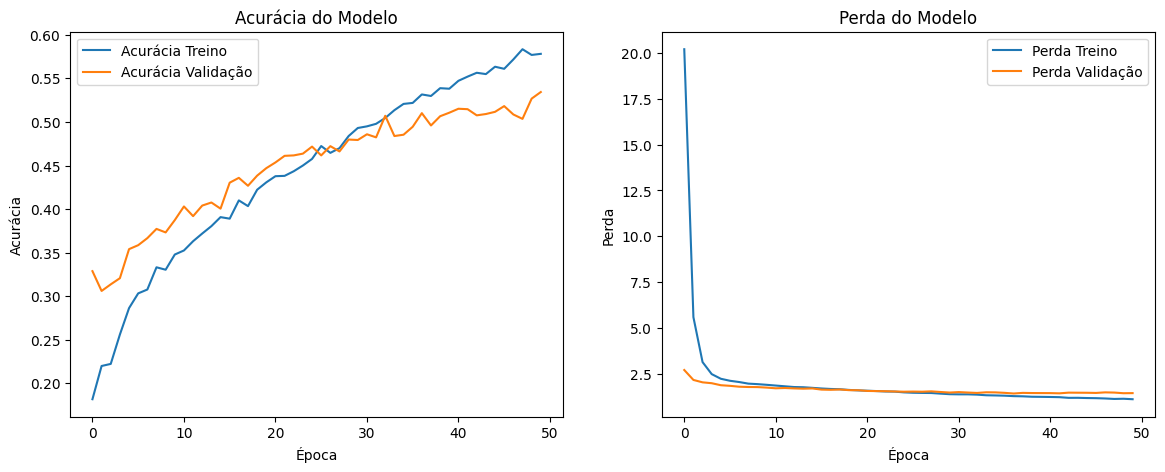

In [8]:
# Plotar a acurácia do treinamento e validação
plt.figure(figsize=(14, 5))

# Acurácia
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.title('Acurácia do Modelo')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

# Perda
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda Treino')
plt.plot(history.history['val_loss'], label='Perda Validação')
plt.title('Perda do Modelo')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()

plt.show()


In [9]:
# Salvar o modelo treinado
model.save("../models/music_genre_classifier.h5")
print("Modelo salvo em '../models/music_genre_classifier.h5'")


Modelo salvo em '../models/music_genre_classifier.h5'


aqui decidimos por incrementar nossa análise fazendo previsões no conjunto de teste e gerando um relatório de classificação. Também plotamos a matriz de confusão para visualizar o desempenho em cada classe.

In [10]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Gerar o relatório de classificação
print("Relatório de Classificação:\n")
print(classification_report(y_test, y_pred, target_names=genres))


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Relatório de Classificação:

              precision    recall  f1-score   support

       blues       0.43      0.37      0.40       200
   classical       0.72      0.89      0.80       196
     country       0.32      0.52      0.40       194
       disco       0.47      0.44      0.45       198
      hiphop       0.53      0.46      0.49       196
        jazz       0.45      0.31      0.36       198
       metal       0.67      0.86      0.75       200
         pop       0.73      0.74      0.74       200
      reggae       0.56      0.51      0.53       200
        rock       0.42      0.24      0.31       198

    accuracy                           0.53      1980
   macro avg       0.53      0.53      0.52      1980
weighted avg       0.53      0.53      0.52      1980



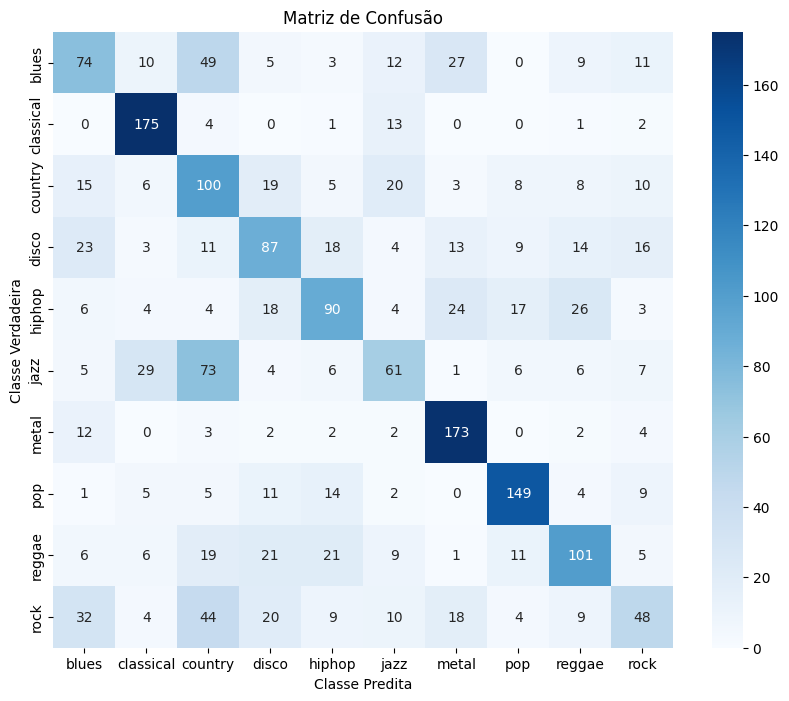

In [11]:
# Gerar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=genres, yticklabels=genres)
plt.title("Matriz de Confusão")
plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Predita')
plt.show()


MELHORIAS

Após avaliar o modelo inicial, percebemos que há espaço para melhorias. Vamos implementar algumas estratégias para melhorar o desempenho, como normalização dos dados, adição de Batch Normalization, uso de callbacks como Early Stopping e Model Checkpoint, e ajuste de hiperparâmetros.


Para melhorar a eficiência do treinamento e o desempenho geral do modelo, é importante que os dados de entrada estejam normalizados. A normalização garante que todas as features tenham a mesma escala, o que facilita a convergência do modelo durante o treinamento. Neste bloco de código, utilizamos o StandardScaler do scikit-learn para normalizar as MFCCs extraídas dos arquivos de áudio.



Para melhorar o desempenho do modelo, aplicamos a normalização aos dados de entrada utilizando o StandardScaler, que padroniza as features removendo a média e escalando para a variância unitária.


        ---> A normalização dos dados ajuda a estabilizar e acelerar o treinamento, garantindo que todas as features estejam na mesma escala.

In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

# refatorando os dados para aplicar a normalização
# planificando os dois eixos para aplicar o scaler
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# ajustando e transformando os dados
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

# Reshape de volta para a forma original
X_train_scaled = X_train_scaled.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test_scaled = X_test_scaled.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

# Atualizar as variáveis de treino e teste
X_train, X_test = X_train_scaled, X_test_scaled

print("Dados normalizados com sucesso!")


Dados normalizados com sucesso!


Para estabilizar e acelerar o processo de treinamento, adicionamos camadas de Batch Normalization após cada camada densa da rede neural. Isso ajuda a reduzir o desvio interno das ativações, permitindo o uso de taxas de aprendizado mais altas e melhorando a performance geral do modelo.

In [13]:
# Redefinir a arquitetura do modelo com Batch Normalization
model_bn = keras.Sequential([
    keras.layers.Flatten(input_shape=(X_train.shape[1], X_train.shape[2])),
    
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    
    keras.layers.Dense(len(genres), activation='softmax')
])

# Compilar o modelo
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model_bn.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Resumo do modelo
model_bn.summary()


c:\Users\ianfe\Desktop\music bot\env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 1690)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       865,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,034,890 (3.95 MB)

 Trainable params: 1,033,098 (3.94 MB)

 Non-trainable params: 1,792 (7.00 KB)

Para evitar overfitting e otimizar o processo de treinamento, implementamos os callbacks de Early Stopping e Model Checkpoint. O Early Stopping interrompe o treinamento se a perda de validação não melhorar após um número especificado de épocas, enquanto o Model Checkpoint salva o modelo com a melhor acurácia de validação, permitindo recuperar o melhor modelo treinado.

In [ ]:
#  callbacks necessários
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# caminho para salvar o melhor modelo com extensão .keras
checkpoint_path = "../models/best_model.keras"

#  callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                                   monitor='val_accuracy',
                                   save_best_only=True,
                                   mode='max',
                                   verbose=1)

# treinando o modelo com callbacks
history_bn = model_bn.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,  # aumentando o número de épocas para permitir que o modelo tenha mais chances de melhorar
    batch_size=32,
    callbacks=[early_stop, model_checkpoint],
    verbose=1
)


Epoch 1/100
247/248 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2560 - loss: 2.5315
Epoch 1: val_accuracy improved from -inf to 0.44293, saving model to ../models/best_model.keras
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2564 - loss: 2.5295 - val_accuracy: 0.4429 - val_loss: 1.5634
Epoch 2/100
241/248 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4000 - loss: 1.8313
Epoch 2: val_accuracy improved from 0.44293 to 0.51010, saving model to ../models/best_model.keras
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4005 - loss: 1.8300 - val_accuracy: 0.5101 - val_loss: 1.3878
Epoch 3/100
243/248 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4556 - loss: 1.6498
Epoch 3: val_accuracy improved from 0.51010 to 0.54040, saving model to ../models/best_model.keras
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4557 - loss: 1.6491 - val_accuracy: 0.5404 - val_loss: 1.2886
Epoch 4/100
242/248 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4946 - loss: 1.4991
Epoch 4

mesma coisa do trecho de código anterior, porém aqui estamos testando com patience de 15

In [ ]:
checkpoint_path_improved = "../models/best_model_improved.keras"

#  callbacks aprimorados
early_stop_improved = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
model_checkpoint_improved = ModelCheckpoint(filepath=checkpoint_path_improved,
                                           monitor='val_accuracy',
                                           save_best_only=True,
                                           mode='max',
                                           verbose=1)

# treina modelo aprimorado com callbacks atualizados
history_improved = model_bn.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,  # Pode ser ajustado conforme necessário
    batch_size=32,
    callbacks=[early_stop_improved, model_checkpoint_improved],
    verbose=1
)


Epoch 1/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7081 - loss: 0.8399
Epoch 1: val_accuracy improved from -inf to 0.64293, saving model to ../models/best_model_improved.keras
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7081 - loss: 0.8399 - val_accuracy: 0.6429 - val_loss: 1.0424
Epoch 2/100
242/248 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7140 - loss: 0.8137
Epoch 2: val_accuracy improved from 0.64293 to 0.64596, saving model to ../models/best_model_improved.keras
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7140 - loss: 0.8136 - val_accuracy: 0.6460 - val_loss: 1.0435
Epoch 3/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7477 - loss: 0.7395
Epoch 3: val_accuracy did not improve from 0.64596
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7477 - loss: 0.7396 - val_accuracy: 0.6460 - val_loss: 1.0487
Epoch 4/100
245/248 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7388 - loss: 0.7684
Epoch 4: val_accuracy improved from 0

Para ajustar dinamicamente a taxa de aprendizado durante o treinamento, utilizamos o callback ReduceLROnPlateau, que reduz a taxa de aprendizado quando a perda de validação não melhora após algumas épocas.

In [16]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Definir o callback para reduzir a taxa de aprendizado
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                 patience=5,
                                 factor=0.5,
                                 min_lr=1e-6,
                                 verbose=1)

# Treinar o modelo com callbacks aprimorados e redução de taxa de aprendizado
history_lr = model_bn.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop_improved, model_checkpoint_improved, lr_reduction],
    verbose=1
)


Epoch 1/100
243/248 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7055 - loss: 0.8264
Epoch 1: val_accuracy did not improve from 0.64747
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7056 - loss: 0.8265 - val_accuracy: 0.6348 - val_loss: 1.0417 - learning_rate: 1.0000e-04
Epoch 2/100
243/248 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7256 - loss: 0.7846
Epoch 2: val_accuracy did not improve from 0.64747
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7256 - loss: 0.7846 - val_accuracy: 0.6374 - val_loss: 1.0402 - learning_rate: 1.0000e-04
Epoch 3/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7346 - loss: 0.7531
Epoch 3: val_accuracy did not improve from 0.64747
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7345 - loss: 0.7532 - val_accuracy: 0.6444 - val_loss: 1.0473 - learning_rate: 1.0000e-04
Epoch 4/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7636 - loss: 0.6932
Epoch 4: val_accuracy did not improve from 0.64747
248/248 ━━━━━

Após o treinamento com as melhorias, avaliamos novamente o modelo no conjunto de teste e geramos o relatório de classificação e a matriz de confusão para analisar o desempenho.

Melhor modelo carregado com sucesso!
62/62 - 0s - 6ms/step - accuracy: 0.6475 - loss: 1.0507

Acurácia no conjunto de teste após melhorias: 64.75%
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Relatório de Classificação:

              precision    recall  f1-score   support

       blues       0.69      0.58      0.63       200
   classical       0.86      0.91      0.89       196
     country       0.56      0.52      0.54       194
       disco       0.51      0.59      0.55       198
      hiphop       0.62      0.53      0.57       196
        jazz       0.63      0.74      0.68       198
       metal       0.78      0.81      0.80       200
         pop       0.75      0.72      0.74       200
      reggae       0.60      0.49      0.54       200
        rock       0.49      0.57      0.53       198

    accuracy                           0.65      1980
   macro avg       0.65      0.65      0.65      1980
weighted avg       0.65      0.65      0.65      1980



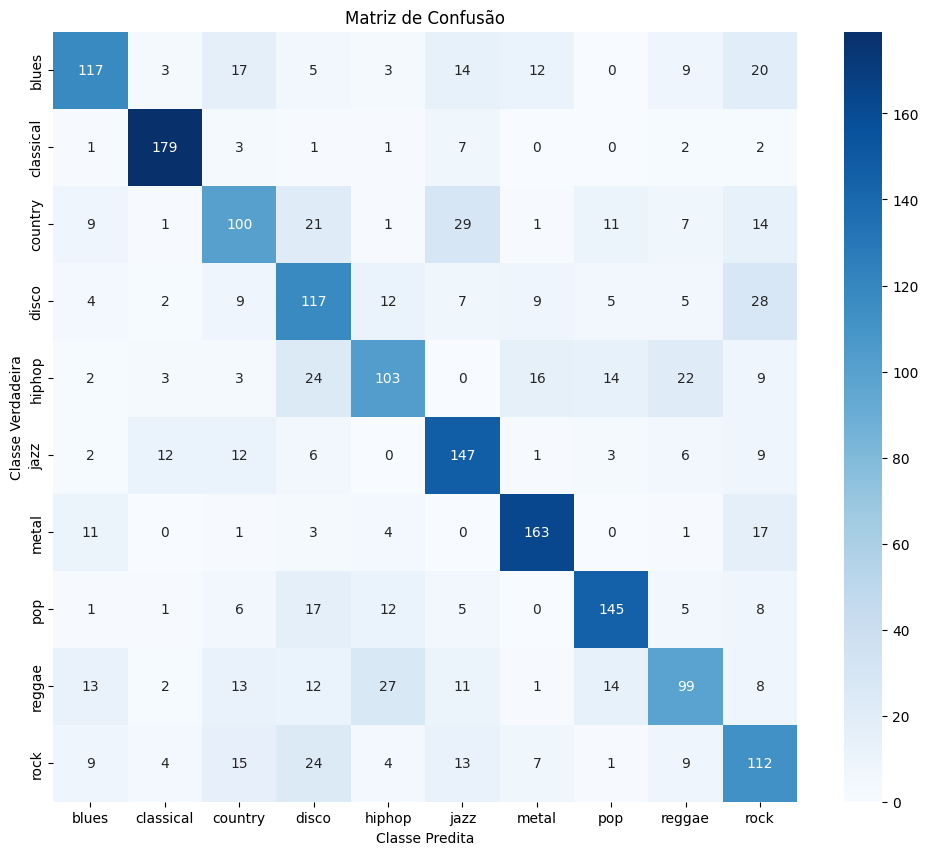

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

# Carregar o melhor modelo salvo
best_model = keras.models.load_model("../models/best_model_improved.keras")
print("Melhor modelo carregado com sucesso!")

# Avaliar o modelo nos dados de teste
test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=2)
print(f"\nAcurácia no conjunto de teste após melhorias: {test_acc * 100:.2f}%")

# Fazer previsões no conjunto de teste
y_pred = best_model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Gerar o relatório de classificação
print("\nRelatório de Classificação:\n")
print(classification_report(y_test, y_pred, target_names=genres))

# Gerar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(12,10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=genres, yticklabels=genres)
plt.title("Matriz de Confusão")
plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Predita')
plt.show()


Plotamos novamente as métricas de acurácia e perda para o modelo aprimorado, comparando o desempenho com o modelo anterior.

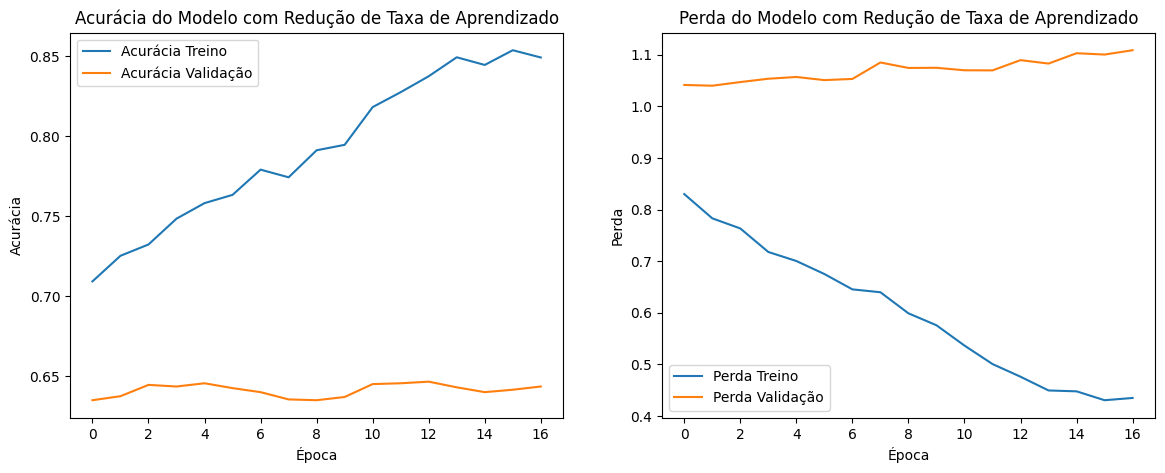

In [18]:
# Plotar a acurácia do treinamento e validação
plt.figure(figsize=(14, 5))

# Acurácia
plt.subplot(1, 2, 1)
plt.plot(history_lr.history['accuracy'], label='Acurácia Treino')
plt.plot(history_lr.history['val_accuracy'], label='Acurácia Validação')
plt.title('Acurácia do Modelo com Redução de Taxa de Aprendizado')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

# Perda
plt.subplot(1, 2, 2)
plt.plot(history_lr.history['loss'], label='Perda Treino')
plt.plot(history_lr.history['val_loss'], label='Perda Validação')
plt.title('Perda do Modelo com Redução de Taxa de Aprendizado')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()

plt.show()


In [19]:
# Salvar o modelo final melhorado
best_model.save("../models/music_genre_classifier_final.keras")
print("Modelo final melhorado salvo em '../models/music_genre_classifier_final.keras'")


Modelo final melhorado salvo em '../models/music_genre_classifier_final.keras'


Para capturar melhor os padrões espaciais presentes nas MFCCs, implementamos uma arquitetura de Rede Neural Convolucional (CNN). As CNNs são eficazes em identificar características locais e padrões em dados com estrutura bidimensional, como imagens e espectrogramas, o que as torna adequadas para este problema.

In [ ]:
# modelo usando uma Rede Neural Convolucional (CNN) com Ajustes no Pooling

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Expandir as dimensões dos dados para incluir o canal (necessário para CNN)
X_train_cnn = X_train[..., np.newaxis]
X_test_cnn = X_test[..., np.newaxis]

# Definir a arquitetura do modelo CNN com pool_size=(2,1) para evitar redução excessiva da largura
model_cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2], 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,1)),
    
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,1)),
    
    Conv2D(128, (2,2), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,1)),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    
    Dense(len(genres), activation='softmax')
])

# Compilar o modelo CNN
model_cnn.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Resumo do modelo CNN
model_cnn.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 130, 13, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 130, 13, 32)    │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 65, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 65, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 65, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 32, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 13, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 32, 13, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 26624)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │     6,816,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,871,178 (26.21 MB)

 Trainable params: 6,870,730 (26.21 MB)

 Non-trainable params: 448 (1.75 KB)

Treinamos o modelo CNN utilizando os mesmos callbacks de Early Stopping, Model Checkpoint e ReduceLROnPlateau para otimizar o processo de treinamento. Esses callbacks ajudam a prevenir overfitting, salvam o melhor modelo e ajustam a taxa de aprendizado dinamicamente.

In [ ]:
# treinando o modelo CNN com Callbacks Ajustados

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# definindo o caminho para salvar o melhor modelo CNN com extensão .keras
checkpoint_path_cnn = "../models/best_model_cnn.keras"

# definindo os callbacks
early_stop_cnn = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint_cnn = ModelCheckpoint(filepath=checkpoint_path_cnn,
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      mode='max',
                                      verbose=1)
lr_reduction_cnn = ReduceLROnPlateau(monitor='val_loss',
                                     patience=5,
                                     factor=0.5,
                                     min_lr=1e-6,
                                     verbose=1)

# treinando o modelo CNN com callbacks ajustados
history_cnn = model_cnn.fit(
    X_train_cnn, y_train,
    validation_data=(X_test_cnn, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop_cnn, model_checkpoint_cnn, lr_reduction_cnn],
    verbose=1
)


Epoch 1/100
247/248 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.4807 - loss: 1.7220
Epoch 1: val_accuracy improved from -inf to 0.17071, saving model to ../models/best_model_cnn.keras
248/248 ━━━━━━━━━━━━━━━━━━━━ 19s 69ms/step - accuracy: 0.4813 - loss: 1.7190 - val_accuracy: 0.1707 - val_loss: 7.9688 - learning_rate: 1.0000e-04
Epoch 2/100
247/248 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7899 - loss: 0.6205
Epoch 2: val_accuracy improved from 0.17071 to 0.54747, saving model to ../models/best_model_cnn.keras
248/248 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - accuracy: 0.7899 - loss: 0.6202 - val_accuracy: 0.5475 - val_loss: 1.6086 - learning_rate: 1.0000e-04
Epoch 3/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9037 - loss: 0.2961
Epoch 3: val_accuracy improved from 0.54747 to 0.73636, saving model to ../models/best_model_cnn.keras
248/248 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.9037 - loss: 0.2961 - val_accuracy: 0.7364 - val_loss: 0.8011 - learning_rate: 

Após o treinamento, avaliamos o modelo CNN no conjunto de teste e geramos o relatório de classificação e a matriz de confusão.

Melhor modelo CNN carregado com sucesso!
62/62 - 1s - 13ms/step - accuracy: 0.7879 - loss: 0.8374

Acurácia no conjunto de teste para o modelo CNN: 78.79%
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step

Relatório de Classificação para o Modelo CNN:

              precision    recall  f1-score   support

       blues       0.84      0.81      0.83       200
   classical       0.91      0.94      0.92       196
     country       0.69      0.76      0.73       194
       disco       0.70      0.75      0.73       198
      hiphop       0.78      0.71      0.74       196
        jazz       0.87      0.85      0.86       198
       metal       0.82      0.91      0.86       200
         pop       0.80      0.82      0.81       200
      reggae       0.77      0.72      0.75       200
        rock       0.69      0.60      0.64       198

    accuracy                           0.79      1980
   macro avg       0.79      0.79      0.79      1980
weighted avg       0.79      0.79      0.79      1980


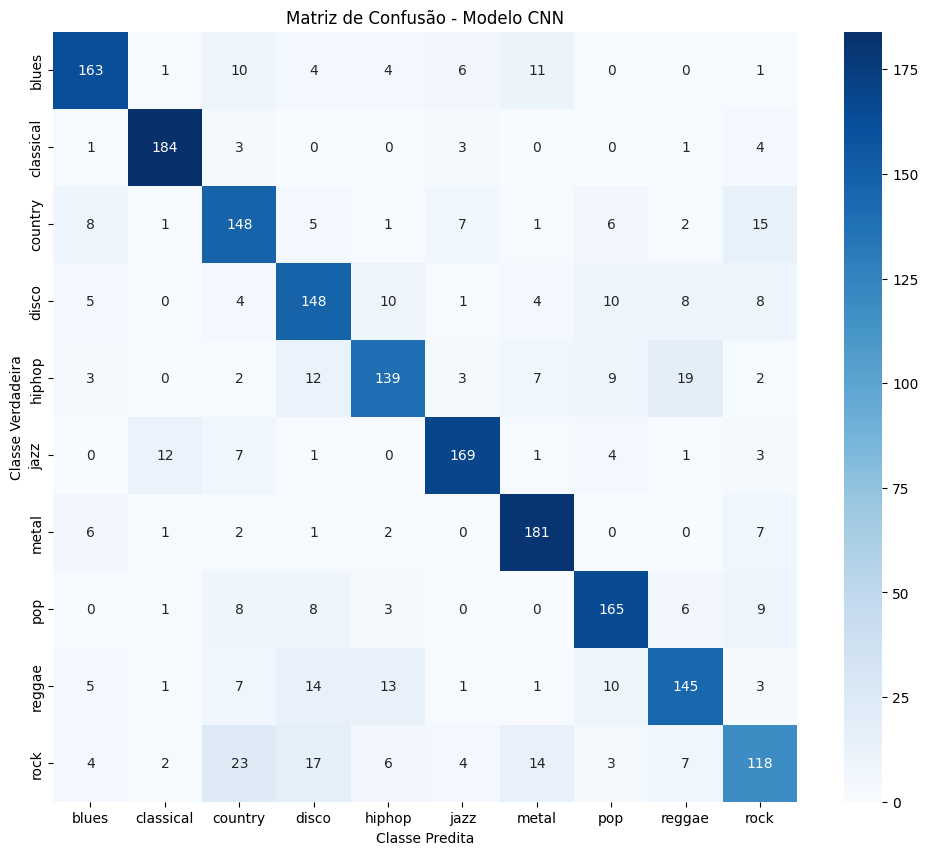

In [25]:
# Bloco de Código 3: Avaliação Detalhada do Modelo CNN

from sklearn.metrics import classification_report, confusion_matrix

# Carregar o melhor modelo CNN salvo
best_model_cnn = keras.models.load_model("../models/best_model_cnn.keras")
print("Melhor modelo CNN carregado com sucesso!")

# Avaliar o modelo nos dados de teste
test_loss_cnn, test_acc_cnn = best_model_cnn.evaluate(X_test_cnn, y_test, verbose=2)
print(f"\nAcurácia no conjunto de teste para o modelo CNN: {test_acc_cnn * 100:.2f}%")

# Fazer previsões no conjunto de teste
y_pred_cnn = best_model_cnn.predict(X_test_cnn)
y_pred_cnn = np.argmax(y_pred_cnn, axis=1)

# Gerar o relatório de classificação
print("\nRelatório de Classificação para o Modelo CNN:\n")
print(classification_report(y_test, y_pred_cnn, target_names=genres))

# Gerar a matriz de confusão
conf_matrix_cnn = confusion_matrix(y_test, y_pred_cnn)

# Plotar a matriz de confusão
plt.figure(figsize=(12,10))
sns.heatmap(conf_matrix_cnn, annot=True, fmt='d', cmap='Blues',
            xticklabels=genres, yticklabels=genres)
plt.title("Matriz de Confusão - Modelo CNN")
plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Predita')
plt.show()


Por fim, plotamos as métricas de acurácia e perda do modelo CNN durante o treinamento e a validação.

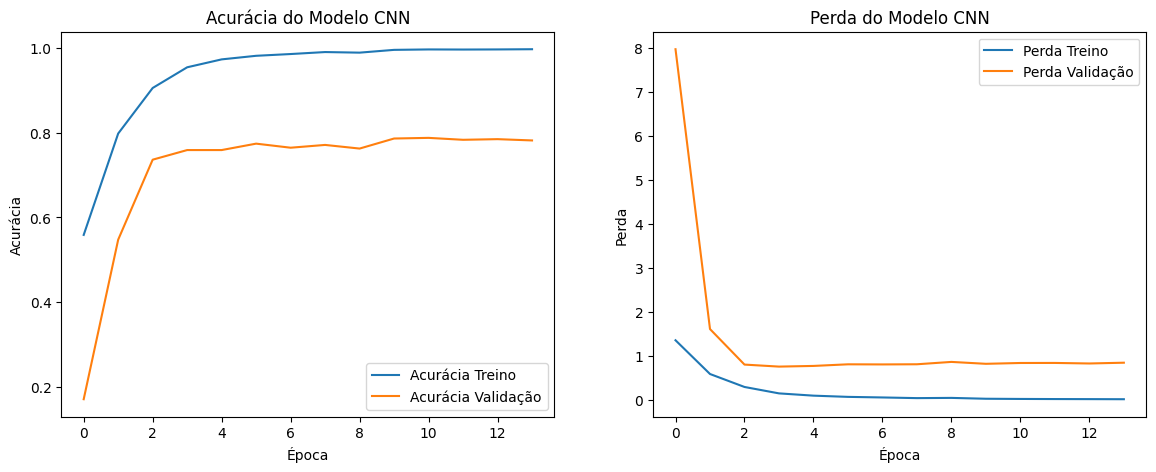

In [ ]:
#  plota acurácia do treinamento e validação
plt.figure(figsize=(14, 5))

# Acurácia
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Acurácia Treino')
plt.plot(history_cnn.history['val_accuracy'], label='Acurácia Validação')
plt.title('Acurácia do Modelo CNN')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

# Perda
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Perda Treino')
plt.plot(history_cnn.history['val_loss'], label='Perda Validação')
plt.title('Perda do Modelo CNN')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()

plt.show()
